In [554]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Disable warnings!
import warnings
warnings.filterwarnings("ignore") 

In [530]:
# Data Source:
# https://www.transtats.bts.gov/databases.asp?Mode_ID=1&Mode_Desc=Aviation&Subject_ID2=0 

### Top 5 busiest Aiport

Regarding to number of departures, top 5 busiest airports and Boston airport are selected for analyzing. Data contains the flights from these selected airports to the all airports in USA.

In [3]:
# ['ATL','LAX','ORD','DFW','JFK','BOS'] #top 5 busiest airports and Boston airport
top5=pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/flight data/top5.csv') # contains betwen 2016-March to 2019-February
top5.shape

(4030987, 111)

In [4]:
list(set(top5['IATA_CODE_Reporting_Airline'])) # the airlines that data consist of

['NK',
 'G4',
 'MQ',
 'DL',
 'F9',
 'WN',
 'OO',
 'AS',
 'UA',
 'YX',
 'HA',
 'VX',
 'AA',
 '9E',
 'OH',
 'B6',
 'YV',
 'EV']

In [5]:
list(set(top5['OriginCityName'])) # the cities where origin airports at

['Boston, MA',
 'Los Angeles, CA',
 'New York, NY',
 'Chicago, IL',
 'Dallas/Fort Worth, TX',
 'Atlanta, GA']

In [531]:
# list(top5.columns)

# COLUMNS AND AIRPORT

In [7]:
cols=['Year','FlightDate','Quarter','Month','DayofMonth','DayOfWeek','Flight_Number_Reporting_Airline',
      'IATA_CODE_Reporting_Airline', 'Tail_Number','Origin',
     'Dest','ActualElapsedTime','AirTime','CRSArrTime','CRSDepTime','DepTime','DepDelay','DepDelayMinutes','DepDel15','DepartureDelayGroups',
     'ArrTime', 'ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','DepTimeBlk','ArrTimeBlk','TaxiIn','TaxiOut','WheelsOff',
     'OriginCityName','OriginStateName','DestCityName','DestStateName']

# 'Flight_Number_Marketing_Airline', 'CRSArrTime','CRSDepTime',

In [575]:
df=top5[cols]
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
FlightDate,2019-01-04,2019-01-04,2019-01-04,2019-01-04,2019-01-04,2019-01-04,2019-01-04,2019-01-04,2019-01-04,2019-01-04
Quarter,1,1,1,1,1,1,1,1,1,1
Month,1,1,1,1,1,1,1,1,1,1
DayofMonth,4,4,4,4,4,4,4,4,4,4
DayOfWeek,5,5,5,5,5,5,5,5,5,5
Flight_Number_Reporting_Airline,5670,5675,5679,5681,5683,5691,5698,5704,5715,5720
IATA_CODE_Reporting_Airline,OO,OO,OO,OO,OO,OO,OO,OO,OO,OO
Tail_Number,N693BR,N975SW,N124SY,N652BR,N986SW,N161SY,N951SW,N150SY,N958SW,N200SY
Origin,ORD,LAX,ORD,LAX,LAX,ORD,ORD,LAX,LAX,LAX


In [586]:
df.isnull().sum()

Year                                    0
FlightDate                              0
Quarter                                 0
Month                                   0
DayofMonth                              0
DayOfWeek                               0
Flight_Number_Reporting_Airline         0
IATA_CODE_Reporting_Airline             0
Tail_Number                          4356
Origin                                  0
Dest                                    0
ActualElapsedTime                  520439
AirTime                            520439
CRSArrTime                         462696
CRSDepTime                         462696
DepTime                             46785
DepDelay                            48120
DepDelayMinutes                     48120
DepDel15                            48120
DepartureDelayGroups                48120
ArrTime                             50042
ArrDelay                            58452
ArrDelayMinutes                     58452
ArrDel15                          

In [587]:
df.dropna(inplace=True)
df.shape

(3508584, 34)

In [19]:
round((1-df.shape[0]/top5.shape[0]),2) # the ratio of dropped data

0.13

In [22]:
delay_groups=pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/L_ONTIME_DELAY_GROUPS.csv_')
delay_groups

,Code,Description
0,-2,Delay < -15 minutes
1,-1,Delay between -15 and -1 minutes
2,0,Delay between 0 and 14 minutes
3,1,Delay between 15 to 29 minutes
4,2,Delay between 30 to 44 minutes
5,3,Delay between 45 to 59 minutes
6,4,Delay between 60 to 74 minutes
7,5,Delay between 75 to 89 minutes
8,6,Delay between 90 to 104 minutes
9,7,Delay between 105 to 119 minutes


## TIME CLASSIFICATION

In [23]:
# # alternative Departure Time classification
# ['0':0,59],['1':100,159],['2':200,259],['3':300,359],['4':400,459],
# ['5':500,559],['6':600,659],['7':700,759],['8':800,859],['9':900,959],
# ['10':1000,1059],['11':1100,1159],['12':1200,1259],['13':1300,1359],
# ['14':1400,1459],['15':1500,1559],['16':1600,1659],['17':1700,1759],
# ['18':1800,1859],['19':1900,1959],['20':2000,2059],
# ['21':2100,2159],['22':2200,2259],['23':2300,2359]

In [588]:
time_class_dict={ 'Q1':[0, 600], 'Q2':[601, 1200],
                    'Q3':[1201,1800], 'Q4':[1801,2400]
                  }

def time_class_maker(value, time_class_dict=time_class_dict):
        for k, v in time_class_dict.items():
            if (value>=v[0] and value<=v[1]):
                return(k)
            elif value=='NaN':
                return('unknown')# if time is null so it will return to string as 'unknown'

In [589]:
def clock(i):
    if i<10:
        new_time='00:0'+str(i).replace('.0','')
    elif i<60:
        new_time='00:'+str(i).replace('.0','')
    elif i<110:
        new_time='0'+str(int(i/100))+':'+'0'+str(int(i%100))
    elif (159<i<210 or 259<i<310 or 359<i<410 or 459<i<510 or 559<i<610 or 659<i<710
         or 759<i<810 or 859<i<910 ):
        new_time='0'+str(int(i/100))+':'+'0'+str(int(i%100))
    elif i< 1000:
        new_time='0'+str(int(i/100))+':'+str(int(i%100)) #.replace('.0','')
    elif (959<i<1010 or 1059<i<1110 or 1159<i<1210
         or 1259<i<1310 or 1359<i<1410 or 1459<i<1510 or 1559<i<1610 or 1659<i<1710
         or 1759<i<1810 or 1859<i<1910 or 1959<i<2010 or 2059<i<2110 or 2159<i<2210
         or 2259<i<2310 ):
        new_time=str(int(i/100))+':'+'0'+str(int(i%100))
    elif i==2400:
        new_time=str(int(i/100))+':00'
    else:
        new_time=str(int(i/100))+':'+str(i%100).replace('.0','')
    return(new_time)

### add Time classes & convert time

In [590]:
df['DepTime_Class']=df['DepTime'].map(lambda x: time_class_maker(x))
df['ArrTime_Class']=df['ArrTime'].map(lambda x: time_class_maker(x))
df['ArrTime2']=df['ArrTime'].map(lambda x: clock(x))
df['DepTime2']=df['DepTime'].map(lambda x: clock(x))
df.shape

(3508584, 38)

### add the binary column

In [591]:
def do_binary(number):
    if number<=0:
        result=0
    else:
        result=1
    return(result)
    

In [592]:
df['binary']=df['DepartureDelayGroups'].map(lambda x: do_binary(x))
df.shape

(3508584, 39)

In [593]:
airport_list=sorted(list(set(df['Origin'])))
airport_list

['ATL', 'BOS', 'DFW', 'JFK', 'LAX', 'ORD']

 # EXPLORE DATA

## Airline Block Time Analysis

In [594]:
import statistics
from scipy import stats

In [595]:
def top_destinations(df,airline,origin,num_of_top_dest,year):
    
    df_res = df[df['Origin']==origin][df['IATA_CODE_Reporting_Airline']==airline][df['Year']==year]
    # to find the count of the rows, any column could be chosen because all of them are accounte equally. Here 'Year' is selected.
    df_res = df_res.groupby(['Dest']).count().sort_values('Year',ascending=False).head(num_of_top_dest)  
    df_res = df_res[['Year']].rename(columns={'Year':'# of arrivals'})
    return df_res

In [596]:
def graphs(table,main_title):

    plt.subplots(2,2, figsize=(20,15))
    plt.suptitle(main_title, size=20) # add above a Main Title

    plt.subplot(2,2,1, title='distribution of Block Time')
    sns.distplot(table['ActualElapsedTime'], bins=25, kde=True)

    plt.subplot(2,2,2, title='distribution of Air Time')
    sns.distplot(table['AirTime'], bins=25, kde=True)

    plt.subplot(2,2,3, title='distribution of Taxi Out')
    sns.distplot(table['TaxiOut'], bins=25, kde=True)

    plt.subplot(2,2,4, title='distribution of Taxi In')
    sns.distplot(table['TaxiIn'], bins=25, kde=True)

In [597]:
def distribution(df,airline,origin,num_of_top_dest,year):
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)

    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline]
        table=table[table["Origin"]==origin][table['Dest']==top_x.index[i]][table['Year']==year]
        
        m_title='--- Graphs from '+ origin + ' to ' + top_x.index[i] +' ---'
        graphs(table,m_title)
        

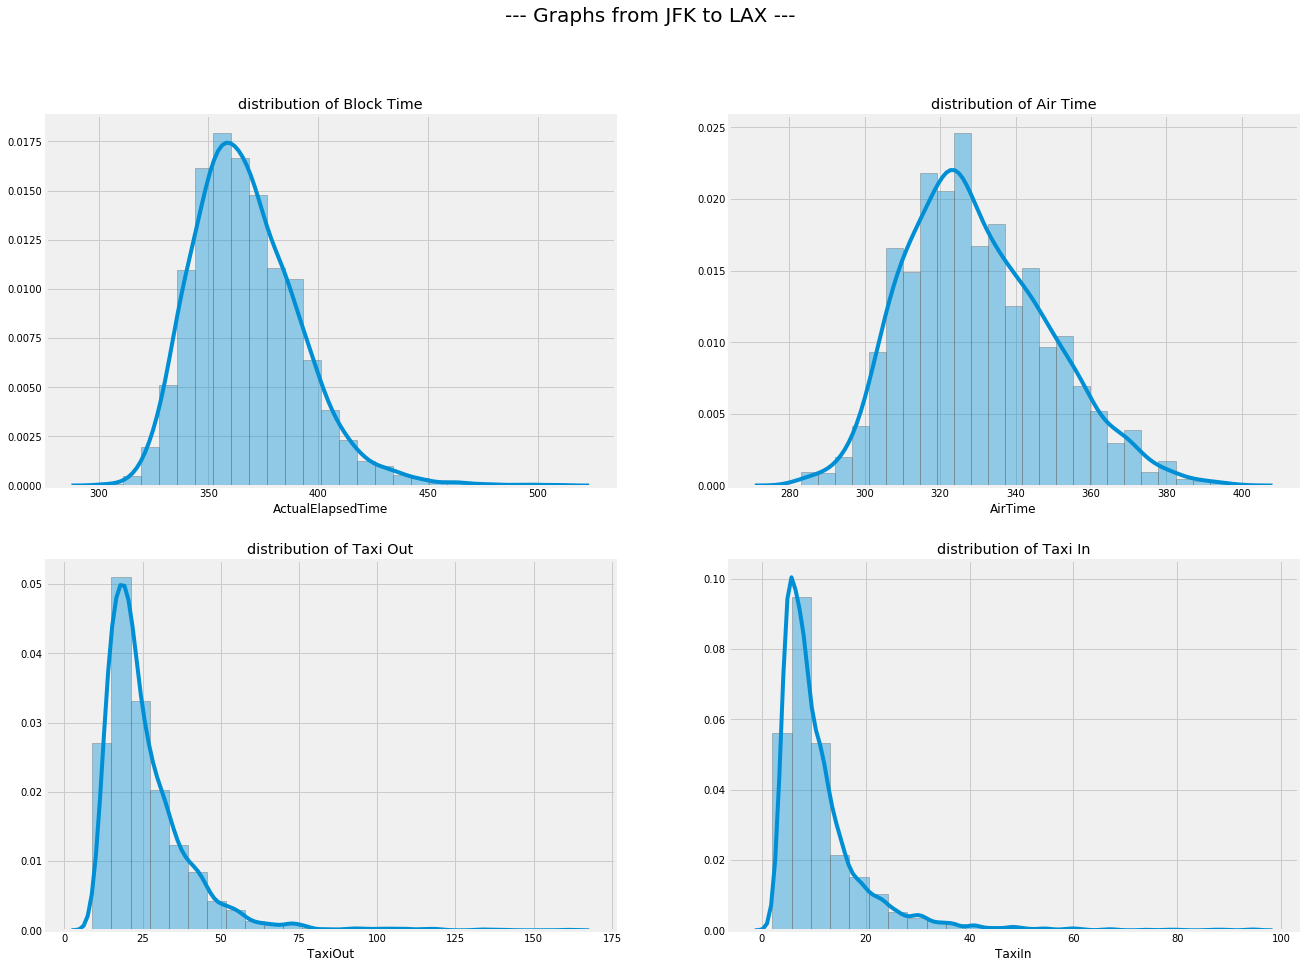

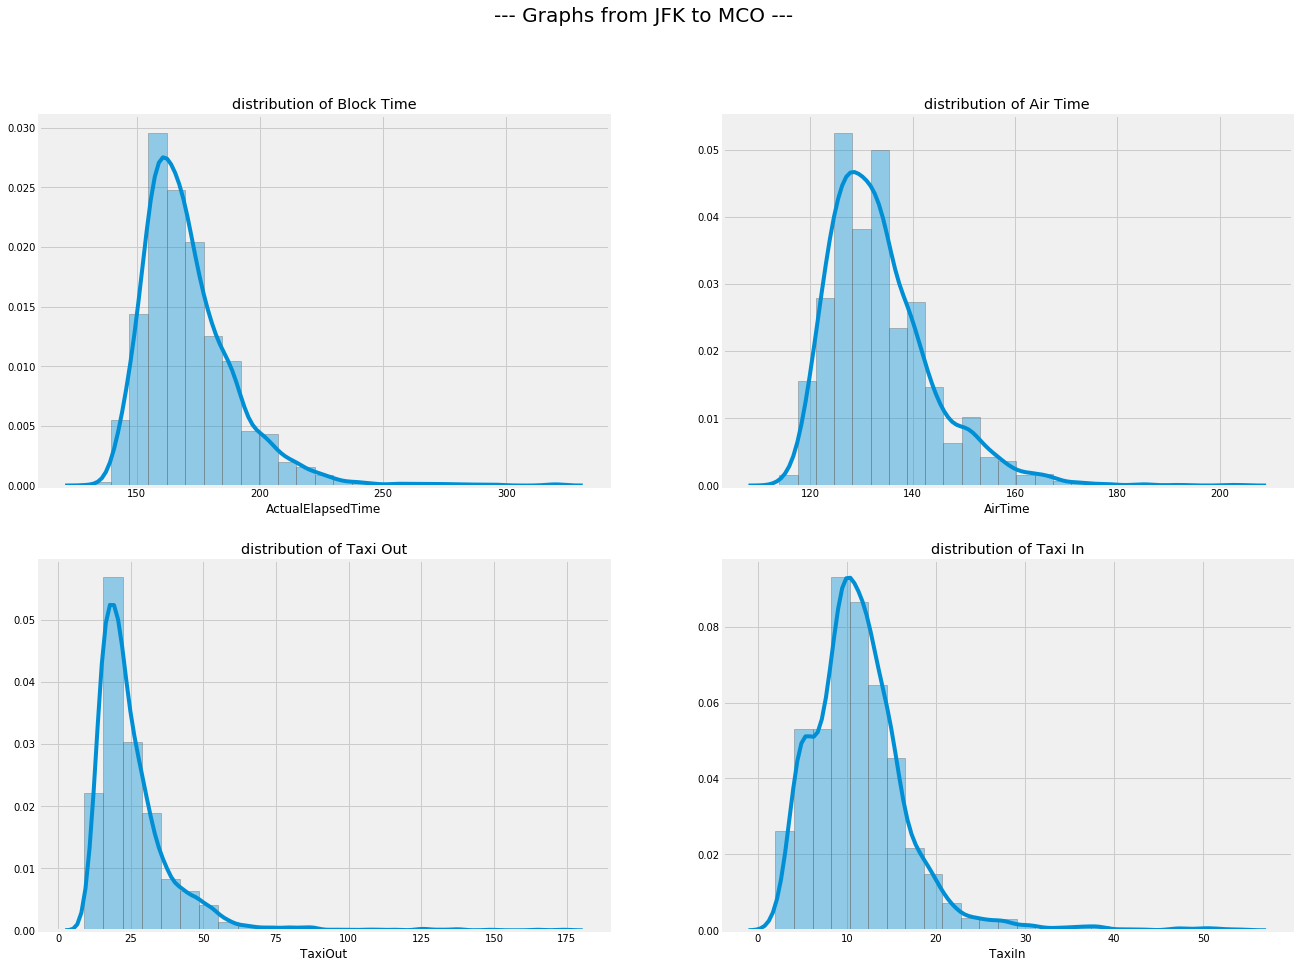

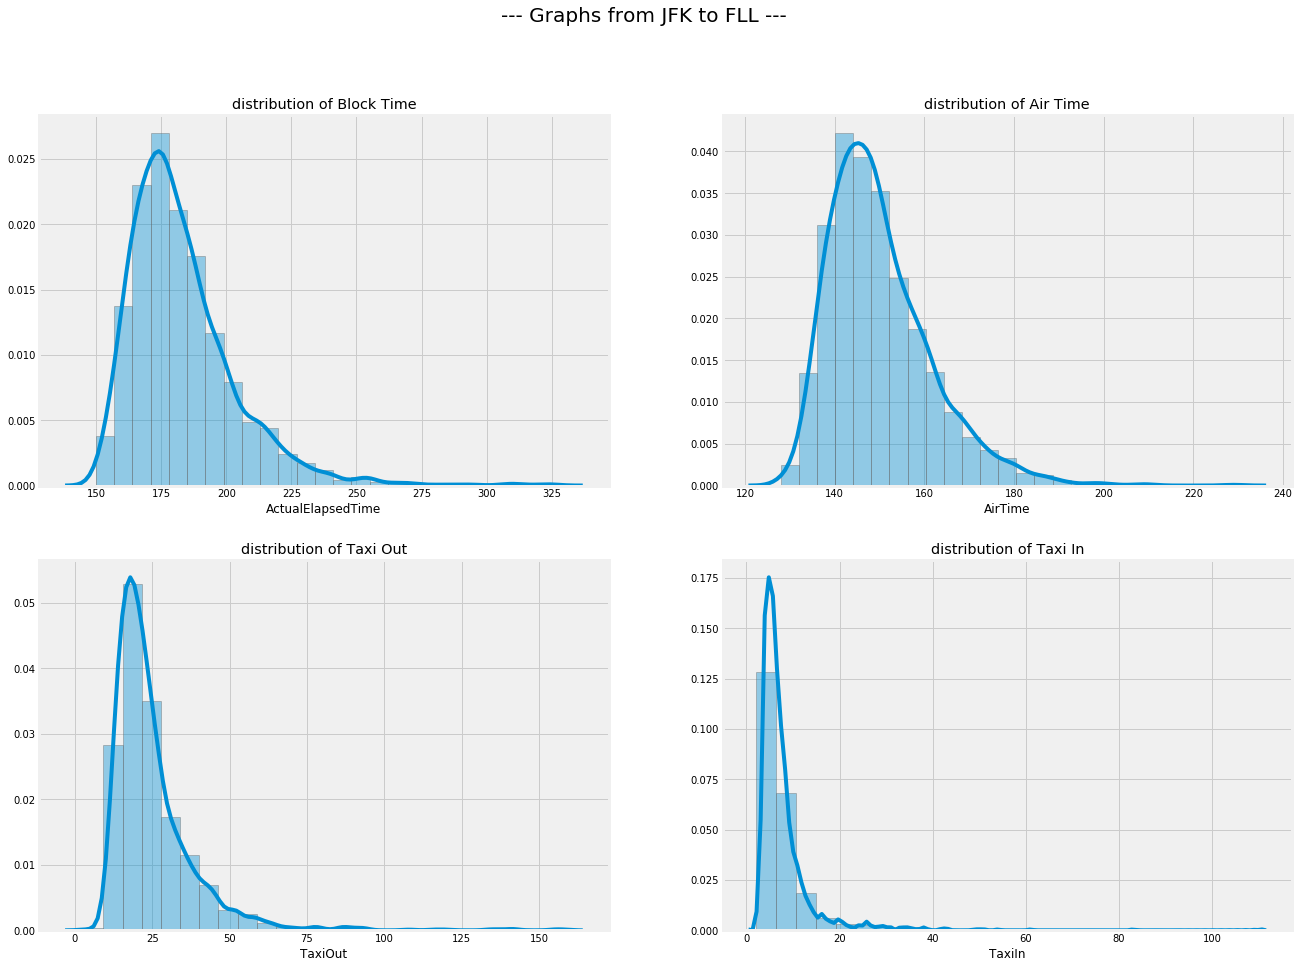

In [598]:
distribution(df,'B6','JFK',3,2018)

In [599]:
df.shape

(3508584, 39)

In [600]:
JB=df[df['IATA_CODE_Reporting_Airline']=='B6']
JB=JB[JB["Origin"]=='JFK'][JB['Dest']=='LAX'][JB['Year']==2018]

In [601]:
JB.shape

(2874, 39)

In [602]:
# confidence intervals
def confidence(df,column,alpha):    
    p = ((1.0-alpha)/2.0) * 100
    lower = np.percentile(df[column], p)
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = np.percentile(df[column], p)
    return (lower,upper)

In [603]:
confidence(JB,'ActualElapsedTime',0.8)

(338.0, 398.0)

In [604]:
def percentile_right(df,column,alpha):
    upper=np.percentile(df[column], alpha*100)
    return upper

In [606]:
percentile_right(JB,'ActualElapsedTime',0.8)

386.0

In [619]:
def parameters(df,alpha):
    
    mean_1=statistics.mean(df['ActualElapsedTime'])
    std_1=statistics.stdev(df['ActualElapsedTime'])
    percentile_1=percentile_right(df,'ActualElapsedTime', alpha)
    upper_1=confidence(df,'ActualElapsedTime',alpha)[1]
    lower_1=confidence(df,'ActualElapsedTime',alpha)[0]
    mean_2=statistics.mean(df['AirTime'])
    std_2=statistics.stdev(df['AirTime'])
    percentile_2=percentile_right(df,'AirTime', alpha)
    upper_2=confidence(df,'AirTime',alpha)[1]
    lower_2=confidence(df,'AirTime',alpha)[0]
    
    mean_3=statistics.mean(df['TaxiOut'])
    std_3=statistics.stdev(df['TaxiOut'])
    percentile_3=percentile_right(df,'TaxiOut', alpha)
    upper_3=confidence(df,'TaxiOut',alpha)[1]
    lower_3=confidence(df,'TaxiOut',alpha)[0]
    
    mean_4=statistics.mean(df['TaxiIn'])
    std_4=statistics.stdev(df['TaxiIn'])
    percentile_4=percentile_right(df,'TaxiIn', alpha)
    upper_4=confidence(df,'TaxiIn',alpha)[1]
    lower_4=confidence(df,'TaxiIn',alpha)[0]
    
    mean_BT=mean_1
    mean_composition=mean_2+mean_3+mean_4
    var_BT=std_1**2
    var_composition=std_2**2+std_3**2+std_4**2
    percentile_BT=percentile_1
    percentile_composition=percentile_2+percentile_3+percentile_4
    upper_BT=upper_1
    lower_BT=lower_1
    upper_composition=upper_2+upper_3+upper_4
    lower_composition=lower_2+lower_3+lower_4
    
    print (f'Block Time Mean:       {mean_BT:.0f}\nComposition Time Mean: {mean_composition:.0f}\n')
    print(f'Block Time Variance:       {var_BT:.0f}\nComposition Time Variance: {var_composition:.0f}\n')    
    print (f'Block Time {alpha*100:.0f} Percentile:       {percentile_BT:.0f}\nComposition Time {alpha*100:.0f} Percentile: {percentile_composition:.0f}\n')
    print('Block Time %.0f confidence interval:       %.0f and %.0f' % (alpha*100, lower_BT, upper_BT))
    print('Composition Time %.0f confidence interval: %.0f and %.0f' % (alpha*100, lower_composition, upper_composition))

In [627]:
# parameters: dataframe, airline, origin, # of top flight destinations, year, confidence level
def stats(df,airline,origin,num_of_top_dest,year,alpha):
    
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)

    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline]
        table=table[table["Origin"]==origin][table['Dest']==top_x.index[i]][table['Year']==year]
        print(f'\n\n------- Values from  {origin}  to  { top_x.index[i]} -------')
        parameters(table,alpha)


In [628]:
stats(df,'B6','JFK',3,2018,0.8) 



------- Values from  JFK  to  LAX -------
Block Time Mean:       367
Composition Time Mean: 367

Block Time Variance:       584
Composition Time Variance: 633

Block Time 80 Percentile:       386
Composition Time 80 Percentile: 394

Block Time 80 confidence interval:       338 and 398
Composition Time 80 confidence interval: 326 and 419


------- Values from  JFK  to  MCO -------
Block Time Mean:       171
Composition Time Mean: 171

Block Time Variance:       375
Composition Time Variance: 339

Block Time 80 Percentile:       184
Composition Time 80 Percentile: 187

Block Time 80 confidence interval:       152 and 194
Composition Time 80 confidence interval: 143 and 205


------- Values from  JFK  to  FLL -------
Block Time Mean:       183
Composition Time Mean: 183

Block Time Variance:       421
Composition Time Variance: 365

Block Time 80 Percentile:       196
Composition Time 80 Percentile: 199

Block Time 80 confidence interval:       162 and 210
Composition Time 80 confidence

In [629]:
# parameters: dataframe, airline, origin, # of top flight destinations, year
def describe_stats(df,airline,origin,num_of_top_dest,year):
    
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)

    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline]
        table=table[table["Origin"]==origin][table['Dest']==top_x.index[i]][table['Year']==year]
        
        BT_describe=table['ActualElapsedTime'].describe()
        AT_describe=table['AirTime'].describe()
        TO_describe=table['TaxiOut'].describe()
        TI_describe=table['TaxiIn'].describe()
        
        print(f'\n\n--- Statistics from  {origin}  to  { top_x.index[i]} ---\n\n{BT_describe}\n{AT_describe}\n{TO_describe}\n{TI_describe}')

In [630]:
describe_stats(df,'B6','JFK',3,2018)



--- Statistics from  JFK  to  LAX ---

count    2874.000000
mean      367.259221
std        24.167042
min       303.000000
25%       350.000000
50%       364.000000
75%       382.000000
max       508.000000
Name: ActualElapsedTime, dtype: float64
count    2874.000000
mean      329.815240
std        18.813434
min       283.000000
25%       316.000000
50%       327.000000
75%       342.000000
max       396.000000
Name: AirTime, dtype: float64
count    2874.000000
mean       26.152053
std        14.105694
min         9.000000
25%        17.000000
50%        22.000000
75%        31.000000
max       161.000000
Name: TaxiOut, dtype: float64
count    2874.000000
mean       11.291928
std         8.942366
min         2.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        95.000000
Name: TaxiIn, dtype: float64


--- Statistics from  JFK  to  MCO ---

count    2197.000000
mean      171.058261
std        19.370613
min       132.000000
25%       158.000000
50%       16

## Airline Domestic Network Map

In [631]:
import datetime, warnings, scipy 
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [303]:
# year_2018=pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/flight data/yearly data/DATA_2018.csv')
# year_2018.shape

(7197910, 111)

In [632]:
df_1=year_2018[year_2018['Month']==7]
df_1.shape

(645299, 111)

In [633]:
temp = pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = temp.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = temp.set_index('IATA_CODE')['LONGITUDE'].to_dict()
airlines_names=pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/L_UNIQUE_CARRIERS.csv_')
abbr_companies = airlines_names.set_index('Code')['Description'].to_dict()

In [634]:
# this fucntion is handled from internet.
def make_map(df, carrier, long_min, long_max, lat_min, lat_max):
    fig=plt.figure(figsize=(15,8)) # 7,3
    ax=fig.add_axes([0.,0.,1.,1.])
    m = Basemap(resolution='i',llcrnrlon=long_min, urcrnrlon=long_max,
                  llcrnrlat=lat_min, urcrnrlat=lat_max, lat_0=0, lon_0=0,)
    df2 = df_1[df_1['IATA_CODE_Reporting_Airline'] == carrier]
    count_trajectories = df2.groupby(['Origin', 'Dest']).size()
    count_trajectories.sort_values(inplace = True)
    
    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        m.plot(nylon, nylat, marker='o', markersize = 10, markeredgewidth = 1,
                   color = 'seagreen', markeredgecolor='k')

    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        lonlat, lonlon = latitude_airport[dest], longitude_airport[dest]
        if pd.isnull(nylat) or pd.isnull(nylon) or \
                pd.isnull(lonlat) or pd.isnull(lonlon): continue
        if s < 100:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=0.5, color='b',
                             label = '< 100')
        elif s < 200:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='r',
                             label = '100 <.< 200')
        else:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='gold',
                              label = '> 200')    
    #_____________________________________________
    # remove duplicate labels and set their order
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    key_order = ('< 100', '100 <.< 200', '> 200')                
    new_label = OrderedDict()
    for key in key_order:
        if key not in by_label.keys(): continue
        new_label[key] = by_label[key]
    plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':8},
               title='flights per month', facecolor = 'palegreen', 
               shadow = True, frameon = True, framealpha = 1)    
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title('{} --2018 July Domestic Departure Flights'.format(abbr_companies[carrier]),weight='bold')

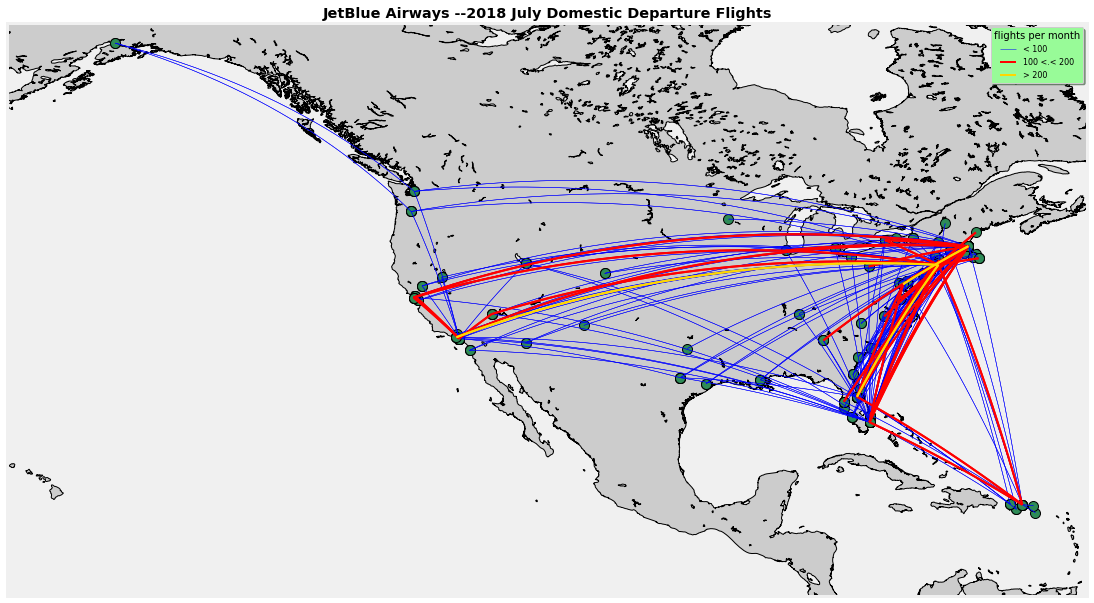

In [636]:
coord = dict()
coord['B6'] = [-160, -60, 10, 63]
# coord['WN'] = [-160, -60, 10, 63]
for carrier in ['B6']: #'B6','WN'
    make_map(df, carrier, *coord[carrier])